In [1]:
from numpy.random import MT19937, RandomState, SeedSequence

In [2]:
import xarray as xr
import xesmf as xe
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import dask
import cftime
import random
import glob
import matplotlib.gridspec as gs
import pint_xarray
import cf_xarray as cfxr
from eofs.xarray import Eof

In [3]:
from dask.distributed import Client, LocalCluster
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 14,Total memory: 63.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44375,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 14
Started: Just now,Total memory: 63.00 GiB
Comm: tcp://127.0.0.1:41339,Total threads: 2
Dashboard: /proxy/35481/status,Memory: 9.00 GiB
Nanny: tcp://127.0.0.1:43773,


In [4]:
seed = 1234

In [68]:
rs = RandomState(MT19937(SeedSequence(seed)))

In [69]:
amplitude = 0.000001

In [70]:
# Set up theta perturbation.
nlon = 192
nlat = 144
# Same at each level so as not to upset vertical stability
perturb = amplitude * (2.*rs.random(nlon*nlat).reshape((nlat,nlon)) - 1.)

In [71]:
# Set poles to zero (only necessary for ND grids, but doesn't hurt EG)
perturb[0] = 0.
perturb[-1] = 0.

In [72]:
perturb.shape

(144, 192)

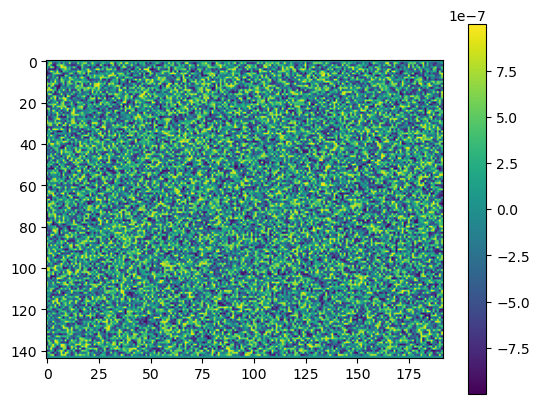

In [73]:
plt.imshow(perturb)
plt.colorbar()

In [74]:
perturb_xr = xr.DataArray(perturb, {'lat' : atm.lat, 'lon' : atm.lon})

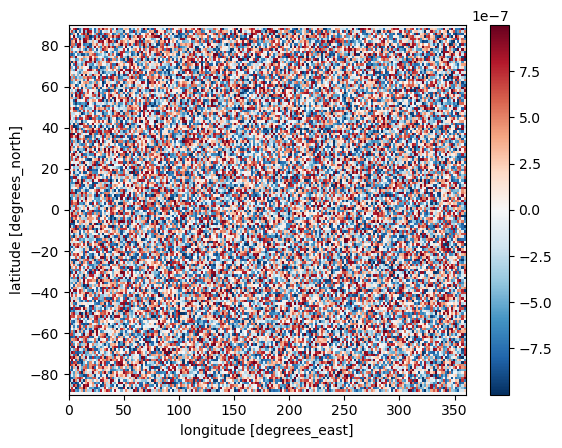

In [75]:
perturb_xr.plot()

In [61]:
atm = xr.open_dataset("/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pd099001_dai.nc")

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/xarray/coding/times.py:710: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


In [76]:
theta = atm.fld_s30i294

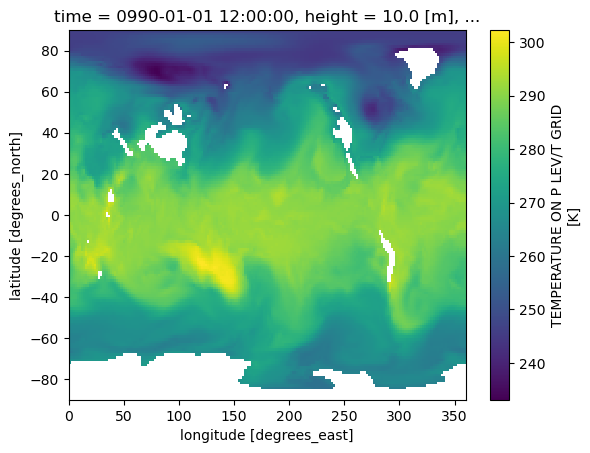

In [77]:
theta[0,1].plot()

In [78]:
theta_0= theta[:,0].compute()

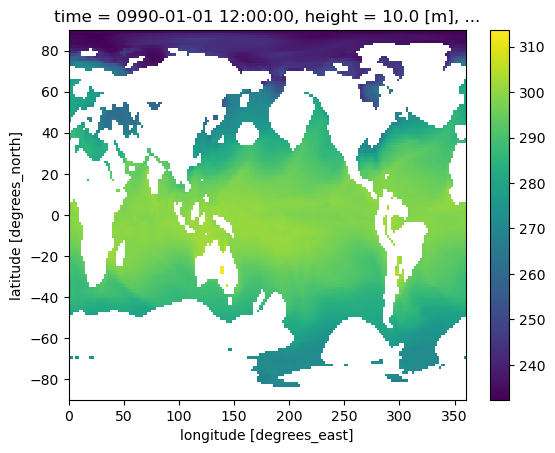

In [79]:
(theta_0[0]+perturb_xr).plot()

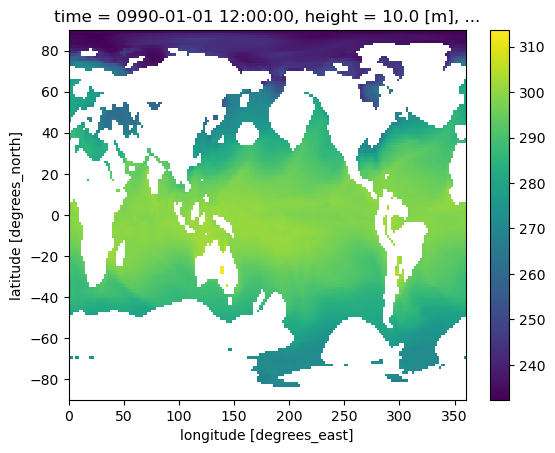

In [80]:
(theta_0[0]+perturb_xr).plot()